In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys

In [4]:
def cancor(x, y, xcenter=True, ycenter=True):
    if x.shape[0] != y.shape[0]:
        sys.exit('unequal number of rows in cancor')

    if x.shape[0] == 0 or x.shape[1] == 0 or y.shape[1] == 0:
        sys.exit('dimension 0 in x or y')

    if xcenter:
        xcenter = x.mean(axis=0)
        x = x - xcenter
    else:
        xcenter = np.zeros(x.shape[1])
    
    if ycenter:
        ycenter = y.mean(axis=0)
        y = y - ycenter
    else:
        ycenter = np.zeros(y.shape[1])

    q1,r1 = np.linalg.qr(x)
    q2,r2 = np.linalg.qr(y)
    # q1, q2 must be unitary
    assert np.allclose(np.dot(q1.T, q1), np.eye(q1.shape[1]))
    assert np.allclose(np.dot(q2.T, q2), np.eye(q2.shape[1]))

    # rank of x (= qr)
    p1 = r1.shape[1]
    if p1 == 0:
        sys.exit('x has rank 0')

    p2 = r2.shape[1]
    if p2 == 0:
        sys.exit('y has rank 0')

    mat = np.dot(q1.T, q2)[:p1,:p2]
    U,S,V = np.linalg.svd(mat)

    u = np.linalg.solve(r1[:p1], U)
    v = np.linalg.solve(r2[:p2], V.T)

    return {
            'cor': S,
            'xcoef': u, 
            'ycoef': v, 
            'xcenter': xcenter, 
            'ycenter': ycenter,
            }

In [11]:
def main():
    df = sm.datasets.get_rdataset('LifeCycleSavings').data
    pop = df[['pop15','pop75']]
    oec = df[['sr','dpi','ddpi']]

    np.set_printoptions(precision=4)
    result = cancor(pop, oec)
    for k,v in result.items():
        print(k,v)

    u = np.dot(pop, result['xcoef'])
    v = np.dot(oec, result['ycoef'])

    plt.plot(u[:,0], v[:,0], 'o')
    plt.title('Canonical correlation analysis')
    plt.xlabel('$u_0$')
    plt.ylabel('$v_0$')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

cor [0.8248 0.3653]
xcoef [[-0.0091 -0.0362]
 [ 0.0486 -0.2603]]
ycoef [[ 8.4710e-03  3.3379e-02 -5.1571e-03]
 [ 1.3074e-04 -7.5882e-05  4.5437e-06]
 [ 4.1706e-03 -1.2268e-02  5.1883e-02]]
xcenter pop15    35.0896
pop75     2.2930
dtype: float64
ycenter sr         9.6710
dpi     1106.7584
ddpi       3.7576
dtype: float64


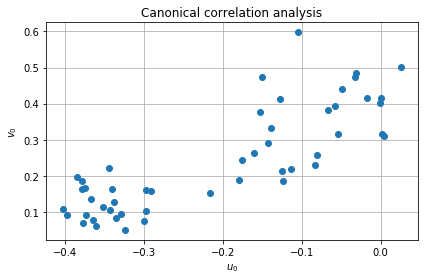

In [12]:
if __name__ == '__main__':
    main()